In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/work/Results/server_ping/mtr_output.csv', delimiter=',')


In [3]:
# Delete rows where the 'Hop' column equals 'HOST:'
df = df.drop(df[df['Hop'] == 'HOST:'].index)
# Change data type of selected columns to float
cols_to_convert = ['Last', 'Avg', 'Best', 'Wrst', 'StDev']
df[cols_to_convert] = df[cols_to_convert].astype(float)


In [4]:
df.head(15)

,Timestamp,Target,PacketSize,Hop,Host,Loss%,Snt,Last,Avg,Best,Wrst,StDev
1,2023-05-03 21:14:32.044651,52.253.119.179,64,1.|--,192.168.0.1,0.0%,10,1.3,1.1,0.7,1.3,0.2
2,2023-05-03 21:14:32.044651,52.253.119.179,64,2.|--,10.248.0.2,0.0%,10,1.8,2.0,1.6,2.6,0.3
3,2023-05-03 21:14:32.044651,52.253.119.179,64,3.|--,45.71.39.254,0.0%,10,2.4,2.3,1.4,2.7,0.4
4,2023-05-03 21:14:32.044651,52.253.119.179,64,4.|--,172.16.201.180,0.0%,10,3.6,3.6,3.2,3.9,0.2
5,2023-05-03 21:14:32.044651,52.253.119.179,64,5.|--,172.18.9.4,0.0%,10,4.2,3.9,3.5,4.5,0.3
6,2023-05-03 21:14:32.044651,52.253.119.179,64,6.|--,172.18.9.6,0.0%,10,3.8,4.0,3.6,4.4,0.3
7,2023-05-03 21:14:32.044651,52.253.119.179,64,7.|--,67.73.160.1,0.0%,10,17.1,10.8,2.9,26.7,8.2
8,2023-05-03 21:14:32.044651,52.253.119.179,64,8.|--,4.69.219.142,10.0%,10,76.0,75.6,73.0,87.3,4.5
9,2023-05-03 21:14:32.044651,52.253.119.179,64,9.|--,4.68.62.2,0.0%,10,63.7,64.0,62.7,70.5,2.5
10,2023-05-03 21:14:32.044651,52.253.119.179,64,10.|--,104.44.230.39,0.0%,10,74.8,68.4,62.7,81.0,6.7


In [5]:
# Define the list of servers to run MTR on
targets = [
    # Azure Japan
    "52.253.119.179",
    # Google Cloud Paris
    "34.155.23.105",
    # Azure Africa
    "20.164.37.45",
    # Google Cloud Tokyo
    "34.84.32.225",
    # Azure Sao Paulo
    "20.206.136.251",
    # Google Cloud Los Angeles
    "34.94.237.104",
    # Azure East US
    "20.115.21.116",
    # Google Cloud Los Angeles
    "34.175.240.213",
    # Azure North EU
    "4.231.225.177", #fix
    # Google Cloud Los Angeles
    "34.176.209.21",
    # Google Cloud Taiwan
    "35.234.37.87"
]

In [6]:
# Define the packet sizes to use
packet_sizes = [64, 128, 256, 512, 1024]

In [7]:
result_df = pd.DataFrame(columns=['Target', 'PacketSize', 'Host', 'Bandwidth'])  # create empty DataFrame

for target in targets:
    for packet_size in packet_sizes:
        target_df = df.loc[(df['Target'] == target) & (df['PacketSize'] == packet_size)]
        time_diffs = target_df['Avg'].diff() / 1000  # convert to seconds
        bandwidths = (packet_size / time_diffs) * 8 / 1000000  # convert to MB/s
        hosts = target_df['Host'] # ignore first row and reset index
        result = pd.DataFrame({'Target': target, 'PacketSize': packet_size, 'Host': hosts, 'Bandwidth': bandwidths})
        result_df = result_df.append(result, ignore_index=True)  # append to result DataFrame
        


In [8]:
result_df.head(4)

In [9]:
df.head(4)

,Timestamp,Target,PacketSize,Hop,Host,Loss%,Snt,Last,Avg,Best,Wrst,StDev
1,2023-05-03 21:14:32.044651,52.253.119.179,64,1.|--,192.168.0.1,0.0%,10,1.3,1.1,0.7,1.3,0.2
2,2023-05-03 21:14:32.044651,52.253.119.179,64,2.|--,10.248.0.2,0.0%,10,1.8,2.0,1.6,2.6,0.3
3,2023-05-03 21:14:32.044651,52.253.119.179,64,3.|--,45.71.39.254,0.0%,10,2.4,2.3,1.4,2.7,0.4
4,2023-05-03 21:14:32.044651,52.253.119.179,64,4.|--,172.16.201.180,0.0%,10,3.6,3.6,3.2,3.9,0.2


In [10]:
# create the dictionary that maps IP addresses to names
ip_to_name = {
    "52.253.119.179": "Azure Japan",
    "34.155.23.105": "Google Cloud Paris",
    "20.164.37.45": "Azure Africa",
    "34.84.32.225": "Google Cloud Tokyo",
    "20.206.136.251": "Azure Sao Paulo",
    "34.94.237.104": "Google Cloud Los Angeles",
    "20.115.21.116": "Azure East US",
    "34.175.240.213": "Google Cloud Los Angeles",
    "4.231.225.177": "Azure North EU", 
    "34.176.209.21": "Google Cloud Los Angeles",
    "35.234.37.87": "Google Cloud Taiwan"
}
# replace the IP addresses with the corresponding names
result_df["Target"] = result_df["Target"].replace(ip_to_name)


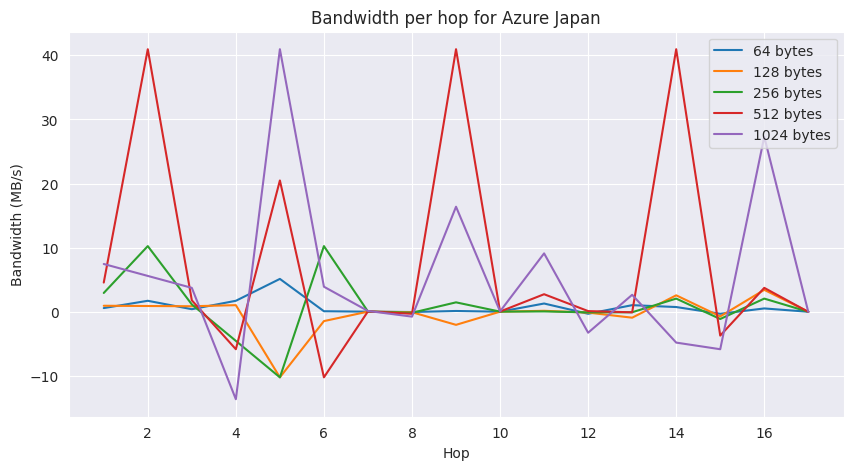

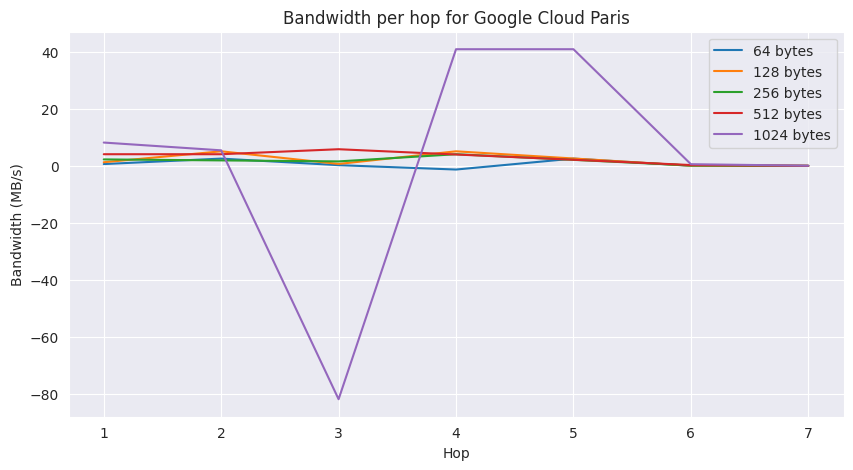

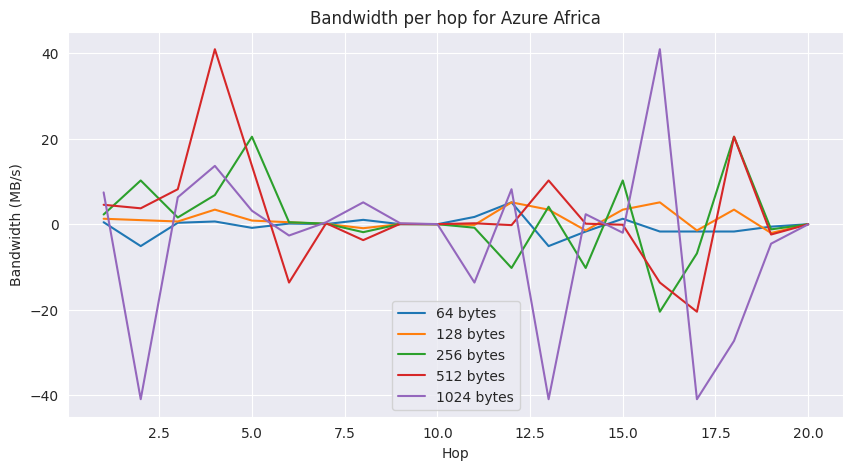

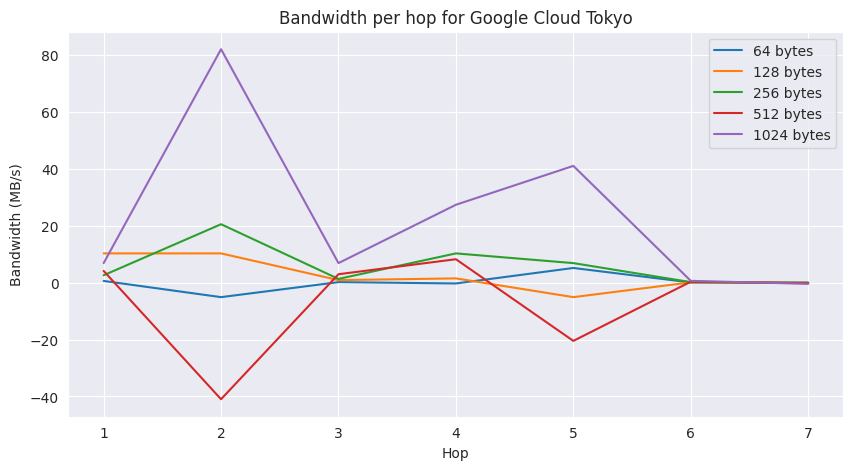

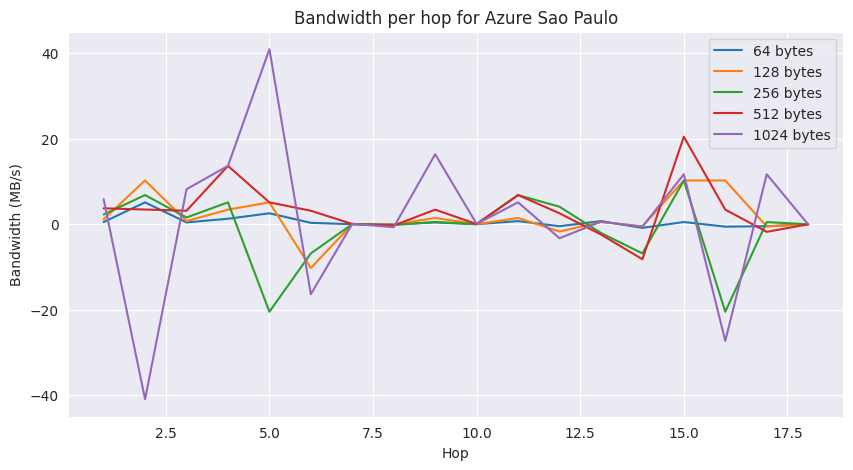

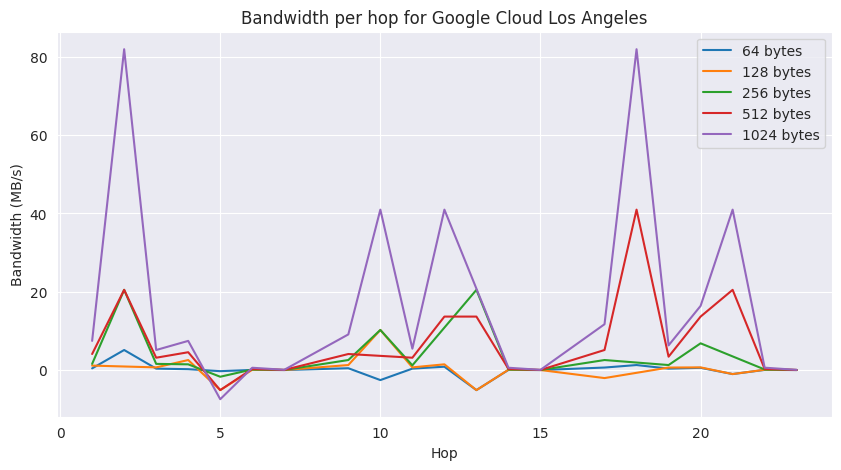

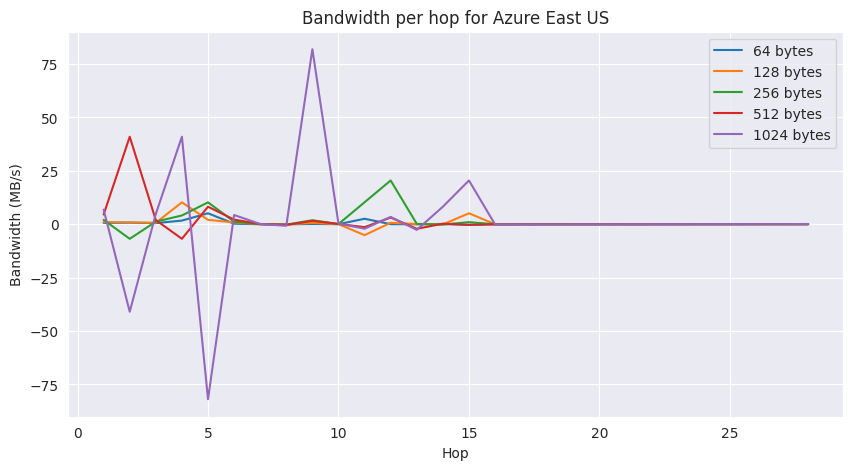

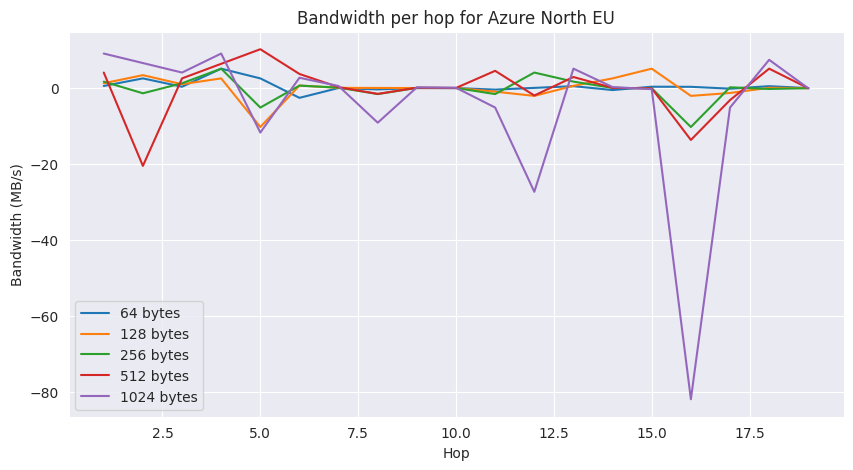

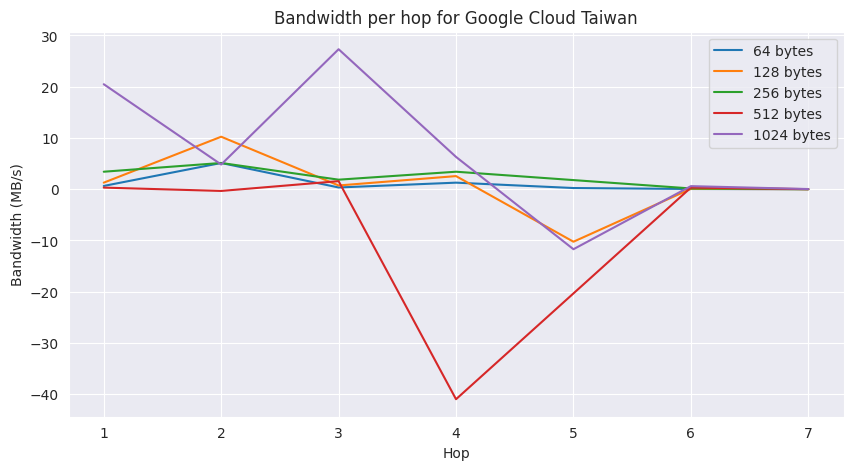

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Set seaborn style
# sns.set_style("darkgrid")

# Loop over each target
for target in result_df['Target'].unique():
    # Filter the data by target
    target_df = result_df[result_df['Target'] == target]
    
    # Initialize the plot
    plt.figure(figsize=(10, 5))
    
    # Loop over each package size
    for package_size in target_df['PacketSize'].unique():
        # Filter the data by package size
        package_size_df = target_df[target_df['PacketSize'] == package_size]
        x_len = len(package_size_df["Host"])
        # Plot the data
        sns.lineplot(x=range(x_len), y='Bandwidth', data=package_size_df, label=f"{package_size} bytes")
    
    # Add title and labels
    plt.title(f"Bandwidth per hop for {target}")
    plt.xlabel("Hop")
    plt.ylabel("Bandwidth (MB/s)")
    
    # Add legend
    plt.legend()

    # Save the plot to a file
    filename = f"/work/Results/imgs/{target}.png"
    plt.savefig(os.path.join(".", filename))
    
    # Show the plot
    plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1704b60d-665c-4225-8de7-957f540dbb72' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>